# TOXIC COMMENT CLASSIFICATION

Discussing things you care about can be difficult. The threat of abuse and harassment online means that many people stop expressing themselves and give up on seeking different opinions. Platforms struggle to effectively facilitate conversations, leading many communities to limit or completely shut down user comments.The Conversation AI team, a research initiative founded by Jigsaw and Google (both a part of Alphabet) are working on tools to help improve online conversation.One area of focus is the study of negative online behaviors, like toxic comments (i.e. comments that are rude, disrespectful or otherwise likely to make someone leave a discussion).This kernel serves as a platform to express my analysis approach for the Toxic comment classification.

This entire analysis is divided into 2 parts:
PART 1: Initial level analysis and EDA
PART 2: Data modeling and prediction

So let's get started,

# TOXIC COMMENT CLASSIFICATION PART 1

In [1]:
setwd('C:/Users/sugand1994/Downloads')

In [2]:
getwd()

[1] "C:/Users/sugand1994/Downloads"

In [3]:
#list of packages required
library(tm)
library(SnowballC)
library(wordcloud)
library(data.table)
library(dplyr)
library(ggplot2)
library(tidyr)
library(tidytext)

Loading required package: NLP
Loading required package: RColorBrewer

Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate



# DATA PREPROCESSING AND CLEANING

In [6]:
#so now let's load the dataset's and have a peek into it
comment <- fread('comment.train.csv')

Read 159571 rows and 8 (of 8) columns from 0.064 GB file in 00:00:05


In [7]:
head(comment)

id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0000997932d777bf,"Explanation Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
0001b41b1c6bb37e,""""" More I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"""""types of accidents"""""""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know. There appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """"",0,0,0,0,0,0
0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0
00025465d4725e87,""""" Congratulations from me as well, use the tools well. Â Â· talk """"",0,0,0,0,0,0


In [8]:
comment.test <- fread('commtest.csv')

Read 153164 rows and 2 (of 2) columns from 0.056 GB file in 00:00:05


In [9]:
head(comment.test)

id,comment_text
00001cee341fdb12,"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"
0000247867823ef7,"== From RfC == The title is fine as it is, IMO."
00013b17ad220c46,""""" == Sources == * Zawe Ashton on Lapland â€” / """""
00017563c3f7919a,":If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message."
00017695ad8997eb,I don't anonymously edit articles at all.
0001ea8717f6de06,Thank you for understanding. I think very highly of you and would not revert without discussion.


In [10]:
sample.sub <- fread('commsample_submission.csv')

In [11]:
head(sample.sub)

id,toxic,severe_toxic,obscene,threat,insult,identity_hate
00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
0001ea8717f6de06,0.5,0.5,0.5,0.5,0.5,0.5


Interesting data as the main focus will be here on the comment_text feature which holds the toxic comments beneath it.
So first let's try to explore what it has based on which we'll be making the predictions for the other 6 target's such as 
toxic, severe_toxic, obscene, threat, insult, identity_hate making it a multi-label classification.

Since this is text data, data conditioning plays a major role,
The steps followed are:
1> remove contractions
2> remove special character's
3> convert them to lower
4> lemmatize the text/strings # we'll go over this later in part 2
5> remove number's
6> remove punctuation's
7> remove stop words
8> strip white spaces

In [61]:
cm_text <- comment[,2]

Let's get rid of contractions by creating a little function that handles most scenarios using gsub(), and then apply that function across all comment_text.

In [14]:
# function to expand contractions in an English-language source
fix.contractions <- function(doc) {
  # "won't" is a special case as it does not expand to "wo not"
  doc <- gsub("won't", "will not", doc)
  doc <- gsub("can't", "can not", doc)
  doc <- gsub("n't", " not", doc)
  doc <- gsub("'ll", " will", doc)
  doc <- gsub("'re", " are", doc)
  doc <- gsub("'ve", " have", doc)
  doc <- gsub("'m", " am", doc)
  doc <- gsub("'d", " would", doc)
  # 's could be 'is' or could be possessive: it has no expansion
  doc <- gsub("'s", "", doc)
  return(doc)
 }

In [63]:
# fix (expand) contractions
cm_text <- sapply(cm_text, fix.contractions)

In [65]:
 #function to remove special characters
removeSpecialChars <- function(x) gsub("[^a-zA-Z0-9 ]", " ", x)

In [66]:
# remove special characters
cm_text <- sapply(cm_text, removeSpecialChars)

In [67]:
# convert them to lower
cm_text <- sapply(cm_text, tolower)

Ok, so we saw how to clean data using apply function. Now let's implement the same directly using tm function for the same before that let's create a corpus. A corpus is nothing but a large, structured set of texts.

In [17]:
comment_corpus = Corpus(VectorSource(comment$comment_text)) # creating a corpus

In [18]:
comment_corpus = tm_map(comment_corpus, content_transformer(tolower))
comment_corpus = tm_map(comment_corpus, removeNumbers)
comment_corpus = tm_map(comment_corpus, removePunctuation)
comment_corpus = tm_map(comment_corpus, removeWords, c("the", "and", stopwords("english")))
comment_corpus = tm_map(comment_corpus, stripWhitespace)

After the above transformations the first review looks like

In [19]:
inspect(comment_corpus[1])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

[1] explanation edits made username hardcore metallica fan reverted werent vandalisms just closure gas voted new york dolls fac please dont remove template talk page since im retired now


To analyze the textual data, we use a Document-Term Matrix (DTM) representation: documents as the rows, terms/words as the columns, frequency of the term in the document as the entries because the number of unique words in the corpus the dimension can be large.

In [20]:
review_dtm <- DocumentTermMatrix(comment_corpus)
review_dtm

<<DocumentTermMatrix (documents: 159571, terms: 230161)>>
Non-/sparse entries: 4361670/36722659261
Sparsity           : 100%
Maximal term length: 4955
Weighting          : term frequency (tf)

In [21]:
inspect(review_dtm[500:505, 500:505])

<<DocumentTermMatrix (documents: 6, terms: 6)>>
Non-/sparse entries: 0/36
Sparsity           : 100%
Maximal term length: 8
Weighting          : term frequency (tf)
Sample             :
     Terms
Docs  john judging jurists justices kathleen law
  500    0       0       0        0        0   0
  501    0       0       0        0        0   0
  502    0       0       0        0        0   0
  503    0       0       0        0        0   0
  504    0       0       0        0        0   0
  505    0       0       0        0        0   0


To reduce the dimension of the DTM, we can remove the less frequent terms such that the sparsity is less than 0.95 and the let's inspect.

In [22]:
review_dtm = removeSparseTerms(review_dtm, 0.99)
review_dtm

<<DocumentTermMatrix (documents: 159571, terms: 469)>>
Non-/sparse entries: 1956302/72882497
Sparsity           : 97%
Maximal term length: 13
Weighting          : term frequency (tf)

In [23]:
inspect(review_dtm[1,1:20])

<<DocumentTermMatrix (documents: 1, terms: 20)>>
Non-/sparse entries: 13/7
Sparsity           : 35%
Maximal term length: 8
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs dont edits just made new now page please remove reverted
   1    1     1    1    1   1   1    1      1      1        1


In [24]:
findFreqTerms(review_dtm, 1000)

[1] "dont"          "edits"         "just"          "made"         
  [5] "new"           "now"           "page"          "please"       
  [9] "remove"        "reverted"      "since"         "talk"         
 [13] "template"      "thanks"        "utc"           "care"         
 [17] "edit"          "guy"           "hey"           "info"         
 [21] "information"   "instead"       "man"           "really"       
 [25] "relevant"      "removing"      "seems"         "talking"      
 [29] "trying"        "war"           "appears"       "articles"     
 [33] "can"           "cant"          "date"          "else"         
 [37] "etc"           "first"         "form"          "guess"        
 [41] "know"          "later"         "let"           "listed"       
 [45] "make"          "may"           "need"          "real"         
 [49] "references"    "review"        "section"       "style"        
 [53] "think"         "want"          "remember"      "thats"        
 [57] "use"           "well"          "around"        "work"         
 [61] "article"       "vandalism"     "will"          "almost"       
 [65] "anything"      "anyway"        "must"          "one"          
 [69] "reference"     "school"        "someone"       "sorry"        
 [73] "word"          "write"         "subject"       "add"          
 [77] "adding"        "already"       "also"          "ask"          
 [81] "believe"       "consider"      "content"       "contribs"     
 [85] "contributions" "copyright"     "create"        "created"      
 [89] "criteria"      "currently"     "deleted"       "deletion"     
 [93] "different"     "doesnt"        "edited"        "fair"         
 [97] "find"          "following"     "full"          "however"      
[101] "image"         "images"        "include"       "link"         
[105] "list"          "media"         "note"          "notice"       
[109] "noticed"       "pages"         "per"           "picture"      
[113] "questions"     "see"           "source"        "specific"     
[117] "speedy"        "tag"           "taken"         "thank"        
[121] "top"           "used"          "using"         "website"      
[125] "wikipedia"     "discuss"       "lets"          "good"         
[129] "group"         "issue"         "admin"         "argument"     
[133] "attacks"       "certainly"     "discussion"    "going"        
[137] "isnt"          "like"          "look"          "matter"       
[141] "notable"       "perhaps"       "probably"      "quite"        
[145] "revert"        "single"        "start"         "topic"        
[149] "said"          "started"       "came"          "makes"        
[153] "making"        "old"           "stop"          "year"         
[157] "years"         "yes"           "back"          "come"         
[161] "redirect"      "point"         "sense"         "better"       
[165] "even"          "mean"          "posted"        "regarding"    
[169] "something"     "take"          "writing"       "youre"        
[173] "bad"           "editing"       "many"          "read"         
[177] "recent"        "simply"        "according"     "always"       
[181] "common"        "facts"         "far"           "get"          
[185] "number"        "rather"        "site"          "stated"       
[189] "still"         "true"          "anyone"        "changes"      
[193] "current"       "either"        "hope"          "less"         
[197] "others"        "question"      "reasons"       "support"      
[201] "sure"          "understand"    "version"       "view"         
[205] "written"       "wrong"         "included"      "several"      
[209] "done"          "history"       "sources"       "theres"       
[213] "youve"         "case"          "continue"      "tell"         
[217] "bit"           "example"       "life"          "block"        
[221] "post"          "thing"         "ago"           "much"         
[225] "able"          "four"          "given"         "got"          
[229] "hard"

In [ ]:
Now we can draw a simple word cloud

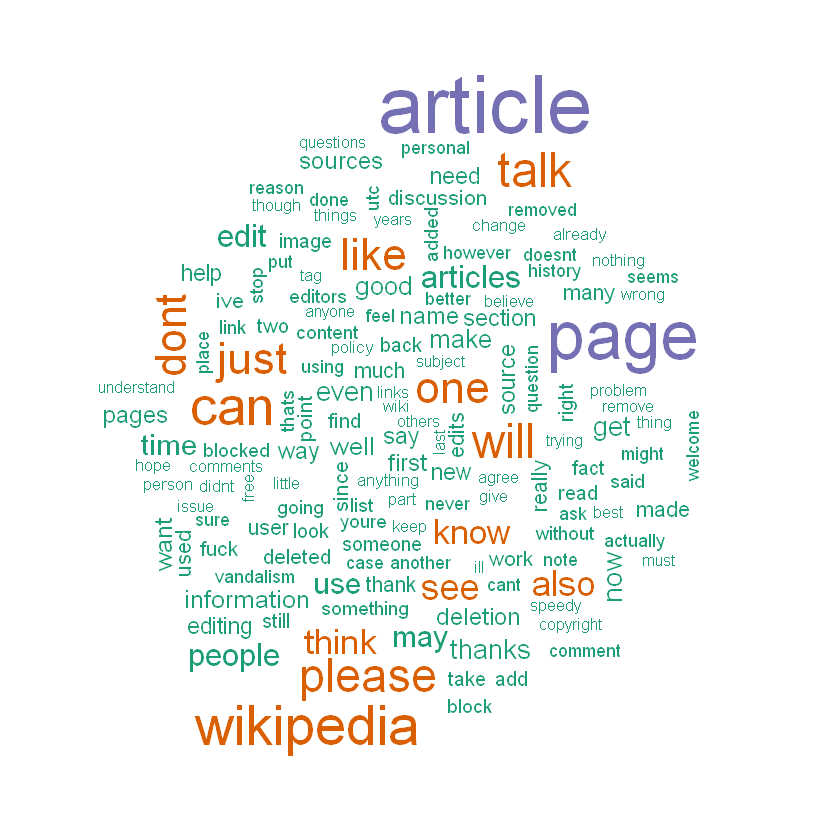

In [38]:
freq = data.frame(sort(colSums(as.matrix(review_dtm)), decreasing=TRUE))
wordcloud(rownames(freq), freq[,1], max.words=150, colors=brewer.pal(3, "Dark2"))


One may think that in the wordcloud, words such as article, wikipedia, do not carry too much meaning in the setting, since we know that the entire corpus is about comments. Therefore sometimes it is necessary to use the tf–idf(term frequency–inverse document frequency) instead of the frequencies of the term as entries, tf-idf measures the relative importance of a word to a document.

In [39]:
review_dtm_tfidf <- DocumentTermMatrix(comment_corpus, control = list(weighting = weightTfIdf))
review_dtm_tfidf = removeSparseTerms(review_dtm_tfidf, 0.95)
review_dtm_tfidf

Warning message in weighting(x):
"empty document(s): 2408 3991 4483 6064 6301 8847 9396 17312 23096 23530 25719 31073 34618 37379 38314 43294 47073 52443 53182 53788 61759 64305 67341 71721 74760 74777 79777 82233 82682 82928 85303 93868 96829 100783 104001 110161 110515 114173 119900 124455 124620 125838 126953 129075 132066 135121 139977 140478 142860 146127 147918 148866 150920 151380 152818 153316 153976 158745"

<<DocumentTermMatrix (documents: 159571, terms: 38)>>
Non-/sparse entries: 557640/5506058
Sparsity           : 91%
Maximal term length: 11
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

In [40]:
# The first document
inspect(review_dtm_tfidf[1,1:20])

<<DocumentTermMatrix (documents: 1, terms: 20)>>
Non-/sparse entries: 7/13
Sparsity           : 65%
Maximal term length: 11
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
    Terms
Docs      dont edit information      just      made       now       page
   1 0.1113484    0           0 0.1059795 0.1594095 0.1368131 0.09403139
    Terms
Docs    please      talk thanks
   1 0.1056423 0.1044466      0


Now let's build another wordcloud for the above

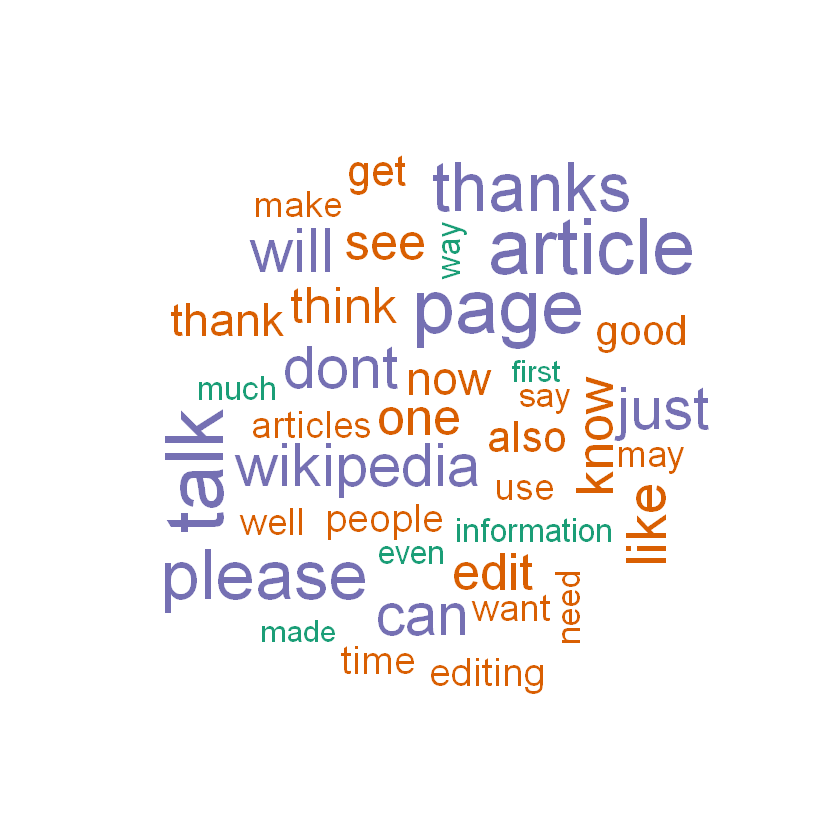

In [41]:
freq = data.frame(sort(colSums(as.matrix(review_dtm_tfidf)), decreasing=TRUE))
wordcloud(rownames(freq), freq[,1], max.words=100, colors=brewer.pal(3, "Dark2"))

Alright, right away let's build a base model using logistic regression from the above and check our accuracy

In [42]:
comment2 = cbind(comment, as.matrix(review_dtm_tfidf))

In [43]:
#split the train data into train and validation
id_train <- sample(nrow(comment2),nrow(comment2)*0.70)
tr = comment2[id_train,]
val = comment2[-id_train,]

In [44]:
names(tr)

[1] "id"            "comment_text"  "toxic"         "severe_toxic" 
 [5] "obscene"       "threat"        "insult"        "identity_hate"
 [9] "dont"          "just"          "made"          "now"          
[13] "page"          "please"        "talk"          "thanks"       
[17] "edit"          "information"   "articles"      "can"          
[21] "first"         "know"          "make"          "may"          
[25] "need"          "think"         "want"          "use"          
[29] "well"          "article"       "will"          "one"          
[33] "also"          "see"           "thank"         "wikipedia"    
[37] "good"          "like"          "even"          "editing"      
[41] "get"           "much"          "time"          "people"       
[45] "way"           "say"

In [45]:
toxic.glm = glm(toxic~ ., family = binomial(link = 'logit'), data = subset(tr,select = -c(1,2,4,5,6,7,8)), maxit = 100)

In [46]:
names(val)

[1] "id"            "comment_text"  "toxic"         "severe_toxic" 
 [5] "obscene"       "threat"        "insult"        "identity_hate"
 [9] "dont"          "just"          "made"          "now"          
[13] "page"          "please"        "talk"          "thanks"       
[17] "edit"          "information"   "articles"      "can"          
[21] "first"         "know"          "make"          "may"          
[25] "need"          "think"         "want"          "use"          
[29] "well"          "article"       "will"          "one"          
[33] "also"          "see"           "thank"         "wikipedia"    
[37] "good"          "like"          "even"          "editing"      
[41] "get"           "much"          "time"          "people"       
[45] "way"           "say"

In [48]:
pred.glm = predict(toxic.glm, newdata = subset(val,select = -c(1:8)) , type = 'response')

In [49]:
predict.glm <- ifelse(pred.glm > 0.5, 1, 0)

In [50]:
misClassifiError  <- mean(predict.glm != val$toxic)

In [54]:
print(paste('accuracy is',(1 - misClassifiError)*100))

[1] "accuracy is 90.4349097593583"


Yahoo!! that's not bad for a base model right, but wait here our goal is to build a model which is highly accuarte in classifying the toxic comments, one thing to notice is that our predictor's built from dict doesn't have the toxic specific set of words, so now let's explore the text data in further and try to extract features from them.

In [75]:
comment_txt <- comment[,2] #assigning the text_comments to comment_txt

# EXPLORATORY DATA ANALYSIS FOR TEXT

Here we'll be using the tidy_text() package to unlock the textdata.Using tidy data principles is a powerful way to make handling data easier and more effective, and this is no less true when it comes to dealing with text. Tidy data has a specific structure:

    Each variable is a column
    Each observation is a row
    Each type of observational unit is a table

We thus define the tidy text format as being a table with one-token-per-row. A token is a meaningful unit of text, such as a word, that we are interested in using for analysis, and tokenization is the process of splitting text into tokens. This one-token-per-row structure is in contrast to the ways text is often stored in current analyses, perhaps as strings or in a document-term matrix. For tidy text mining, the token that is stored in each row is most often a single word, but can also be an n-gram, sentence, or paragraph. In the tidytext package, we provide functionality to tokenize by commonly used units of text like these and convert to a one-term-per-row format.

In [76]:
names(comment_txt)

[1] "comment_text"

In [78]:
colnames(comment_txt)[1] <- 'text' #renaming to avoid confusion

In [80]:
#Within our tidy text framework, we need to both break the text into individual tokens (a process called tokenization) 
#and transform it to a tidy data structure. To do this, we use tidytext’s unnest_tokens() function.
tidy_comment <- comment_txt %>%
  unnest_tokens(word,text)

In [81]:
head(tidy_comment)

word
explanation
why
the
edits
made
under


Having the text data in this format lets us manipulate, process, and visualize the text using the standard set of tidy tools, namely dplyr, tidyr, and ggplot2, as shown in Figure 1.1.

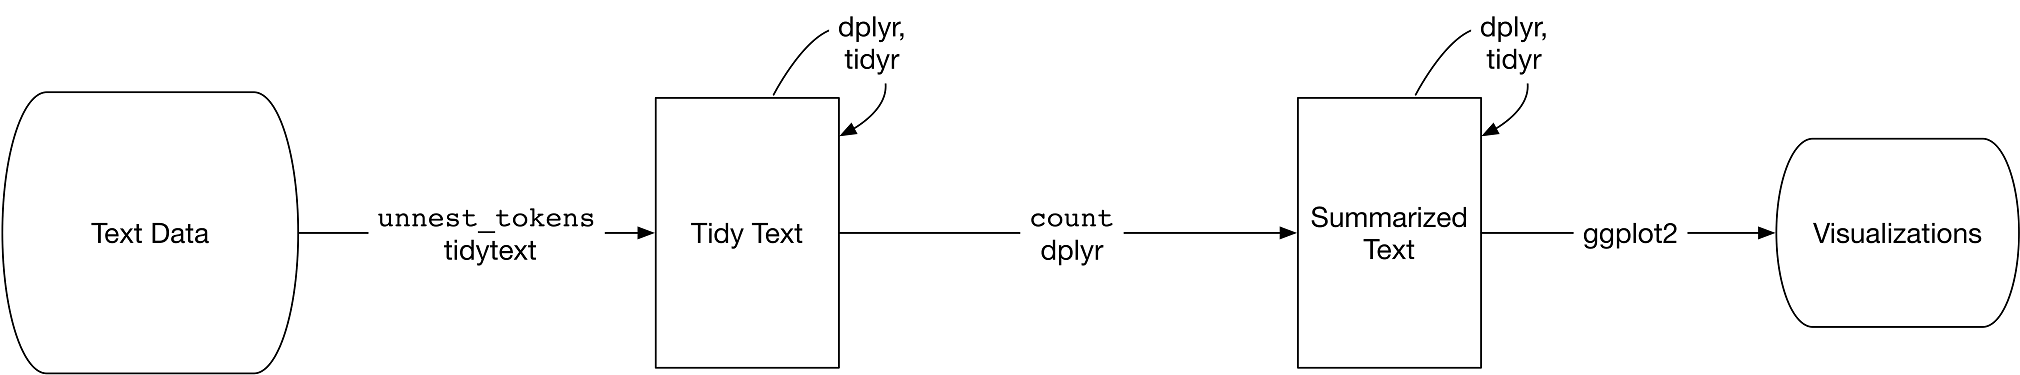

Often in text analysis, we will want to remove stop words; stop words are words that are not useful for an analysis, typically extremely common words such as “the”, “of”, “to”, and so forth in English. We can remove stop words (kept in the tidytext dataset stop_words) with an anti_join().

In [14]:
#remove the stop words

data(stop_words)

tidy_comment <- tidy_comment %>%
  anti_join(stop_words)

Joining, by = "word"


In [17]:
#overview of top 20 words
tidy_comment %>%
 count(word, sort = TRUE) %>%
 top_n(20)

Selecting by n


word,n
article,57714
wikipedia,48602
page,46525
talk,37796
people,18498
edit,18306
articles,16809
time,15893
user,14670
information,12178


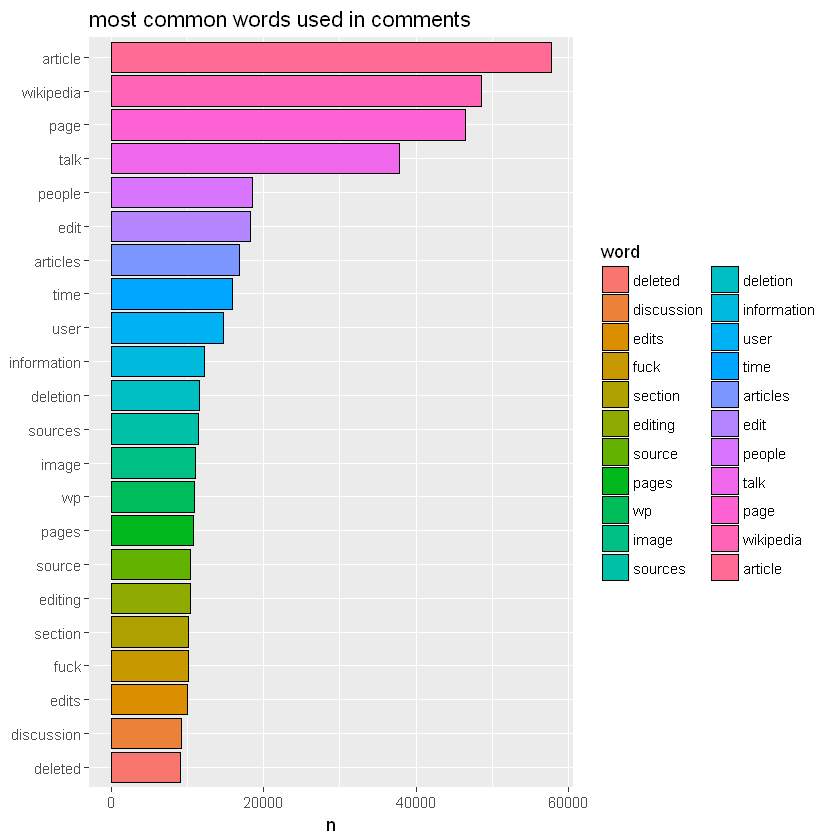

In [67]:
#now let's plot the above using ggplot
tidy_comment %>%
  count(word, sort = TRUE) %>%
  filter(n > 9000) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_bar(aes(fill = word),stat='identity', color = 'black') +
  xlab(NULL) +
  ggtitle('most common words used in comments') + 
  coord_flip()

# Sentiment analysis

Understanding of the emotional intent of words to infer whether a section of text is positive or negative, or perhaps characterized by some other more nuanced emotion like surprise or disgust plays a key in ananlysis of text.

Let's analyze the sentiments using 2 popular lexicons: bing and afinn.

Bing lexicon categorizes words in a binary fashion into positive and negative categories. The AFINN lexicon assigns words with a score that runs between -5 and 5, with negative scores indicating negative sentiment and positive scores indicating positive sentiment. All of this information is tabulated in the sentiments dataset, and tidytext provides a function get_sentiments() to get specific sentiment lexicons without the columns that are not used in that lexicon

In [71]:
afinn <- tidy_comment %>% 
  inner_join(get_sentiments("afinn")) %>% 
  mutate(linenumber = row_number()) %>%
  group_by(index = linenumber %/% 80) %>% 
  summarise(sentiment = sum(score)) %>% 
  mutate(method = "AFINN")

Joining, by = "word"


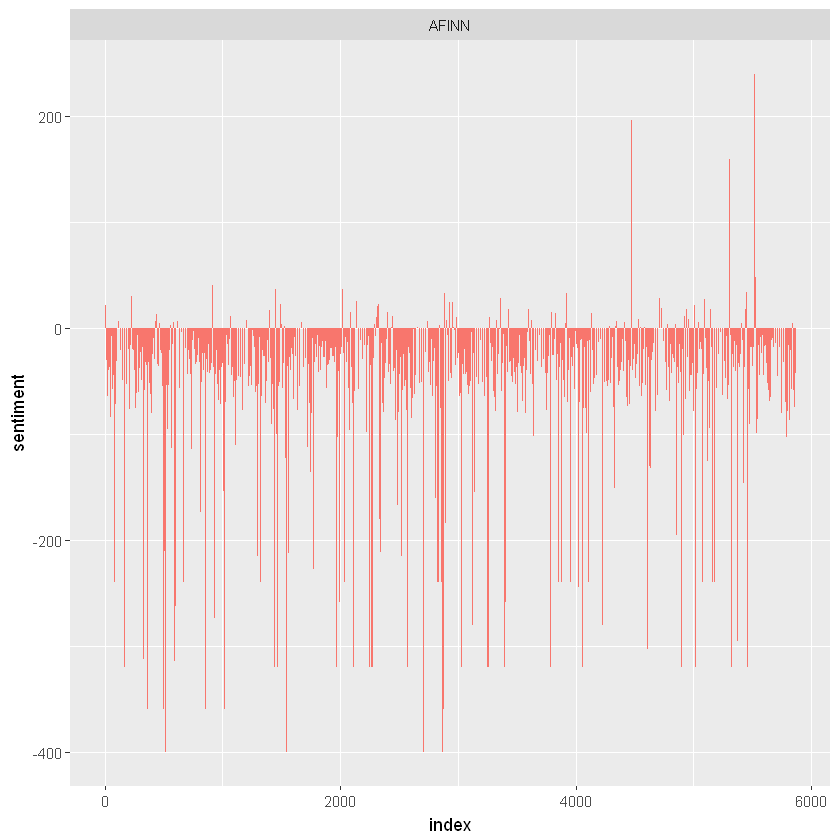

In [72]:
afinn %>%
  ggplot(aes(index, sentiment, fill = method)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~method, ncol = 1, scales = "free_y")

In [104]:
bing <- tidy_comment %>% 
  inner_join(get_sentiments("bing")) %>%
  mutate(method = "Bing et al.") %>%
  mutate(linenumber = row_number()) %>%
  count(method, index = linenumber %/% 30, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment = positive - negative)

Joining, by = "word"


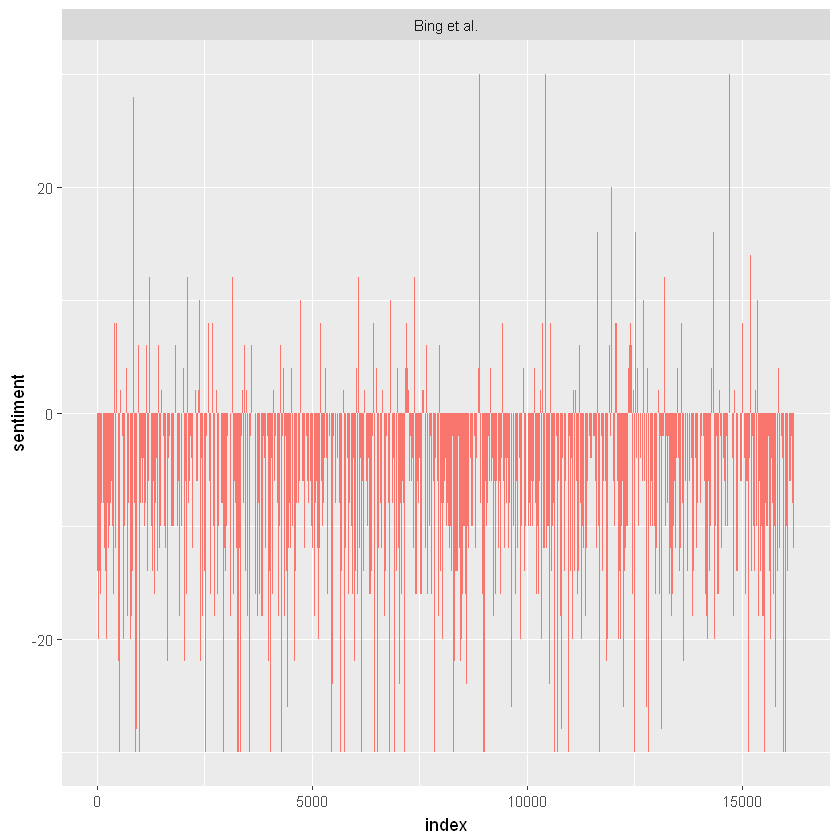

In [105]:
bing %>%
  ggplot(aes(index, sentiment, fill = method)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~method, ncol = 1, scales = "free_y")

Interesting to see the ratio of negative is more than positive, this will be crucial for our ananlysis. Now let's get the count of them.

In [85]:
get_sentiments("bing") %>% 
  count(sentiment)

sentiment,n
negative,4782
positive,2006


Yes bing lexicons have more negative than positive words. Copy that!! Yes indeed.

In [106]:
bing_word_counts <- tidy_comment %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

Joining, by = "word"


In [107]:
head(bing_word_counts)

word,sentiment,n
fuck,negative,10088
free,positive,6426
wrong,negative,5224
speedy,positive,4863
issue,negative,4832
reliable,positive,4726


# Visualizing the most common positive and negative words and their contribution towards sentiment

Selecting by n


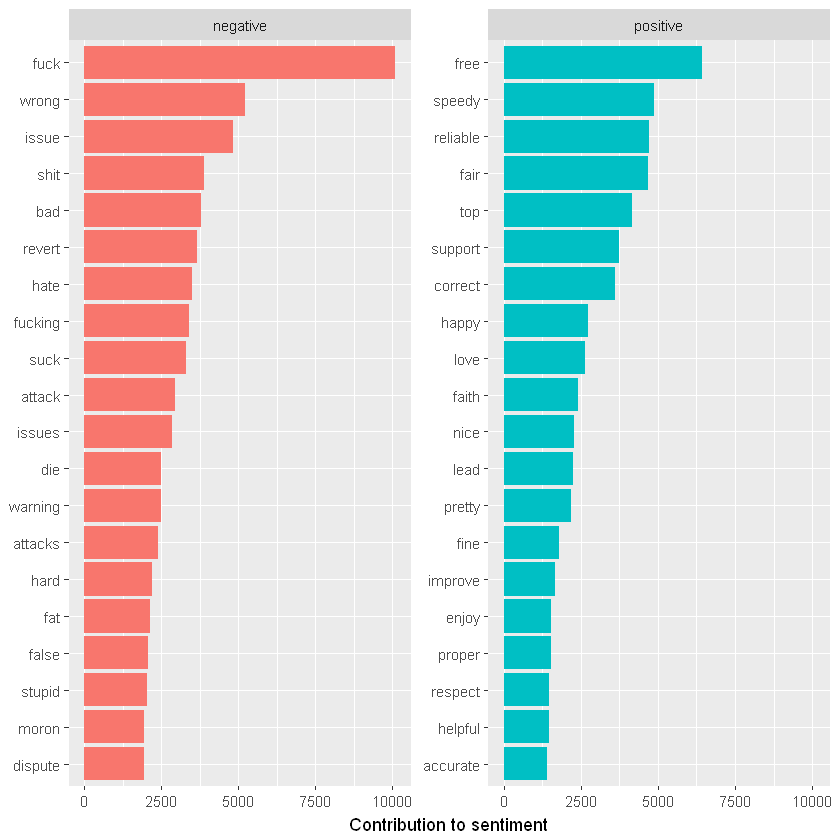

In [117]:
bing_word_counts %>%
  group_by(sentiment) %>%
  top_n(20) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Contribution to sentiment",
       x = NULL) +
  coord_flip()

# Tokenisation of the sentences

In [31]:
#The sentences are broken up into words.The first Six rows of sentences broken up into words are shown below
Words <- comment %>%
  unnest_tokens(word, comment_text) %>%
  count(toxic,severe_toxic,obscene,threat,insult,identity_hate,word) %>%
  ungroup()


In [32]:
head(Words)

toxic,severe_toxic,obscene,threat,insult,identity_hate,word,n
0,0,0,0,0,0,ˆ,50
0,0,0,0,0,0,ˆ:â,2
0,0,0,0,0,0,ˆà,12
0,0,0,0,0,0,ˆâ,14
0,0,0,0,0,0,ˆä,3
0,0,0,0,0,0,ˆã,11


In [37]:
# A look into the unique Categories of Text
Words <- comment %>%
  unnest_tokens(word, comment_text) %>%
  count(toxic,severe_toxic,obscene,threat,insult,identity_hate,word) %>%
  ungroup()

total_words <- Words %>% 
  group_by(toxic,severe_toxic,obscene,threat,insult,identity_hate) %>% 
  summarize(total = sum(n))

total_words

toxic,severe_toxic,obscene,threat,insult,identity_hate,total
0,0,0,0,0,0,9928641
0,0,0,0,0,1,4854
0,0,0,0,1,0,17540
0,0,0,0,1,1,1801
0,0,0,1,0,0,765
0,0,0,1,1,0,934
0,0,1,0,0,0,30128
0,0,1,0,0,1,142
0,0,1,0,1,0,13369
0,0,1,0,1,1,1280


In [34]:
Words <- comment %>%
  unnest_tokens(word, comment_text) %>%
   anti_join(stop_words) %>%
  count(toxic,severe_toxic,obscene,threat,insult,identity_hate,word) %>%
  ungroup()

total_words <- Words %>% 
  group_by(toxic,severe_toxic,obscene,threat,insult,identity_hate) %>% 
  summarize(total = sum(n))

total_words

Joining, by = "word"


toxic,severe_toxic,obscene,threat,insult,identity_hate,total
0,0,0,0,0,0,3890522
0,0,0,0,0,1,1905
0,0,0,0,1,0,6565
0,0,0,0,1,1,697
0,0,0,1,0,0,251
0,0,0,1,1,0,455
0,0,1,0,0,0,10842
0,0,1,0,0,1,60
0,0,1,0,1,0,5257
0,0,1,0,1,1,482


In [38]:
colnames(total_words)

[1] "toxic"         "severe_toxic"  "obscene"       "threat"       
[5] "insult"        "identity_hate" "total"

# TF-IDF

The statistic tf-idf is intended to measure how important a word is to a document in a collection (or corpus) of documents, for example, to one novel in a collection of novels or to one website in a collection of websites.

One measure of how important a word may be is its term frequency (tf), how frequently a word occurs in a document.

Inverse document frequency (idf), decreases the weight for commonly used words and increases the weight for words that are not used very much in a collection of documents. This can be combined with term frequency to calculate a term’s tf-idf (the two quantities multiplied together), the frequency of a term adjusted for how rarely it is used.
 
The inverse document frequency for any given term is defined as

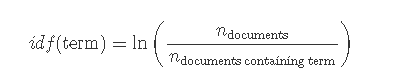

Joining, by = c("toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate")
Selecting by tf_idf


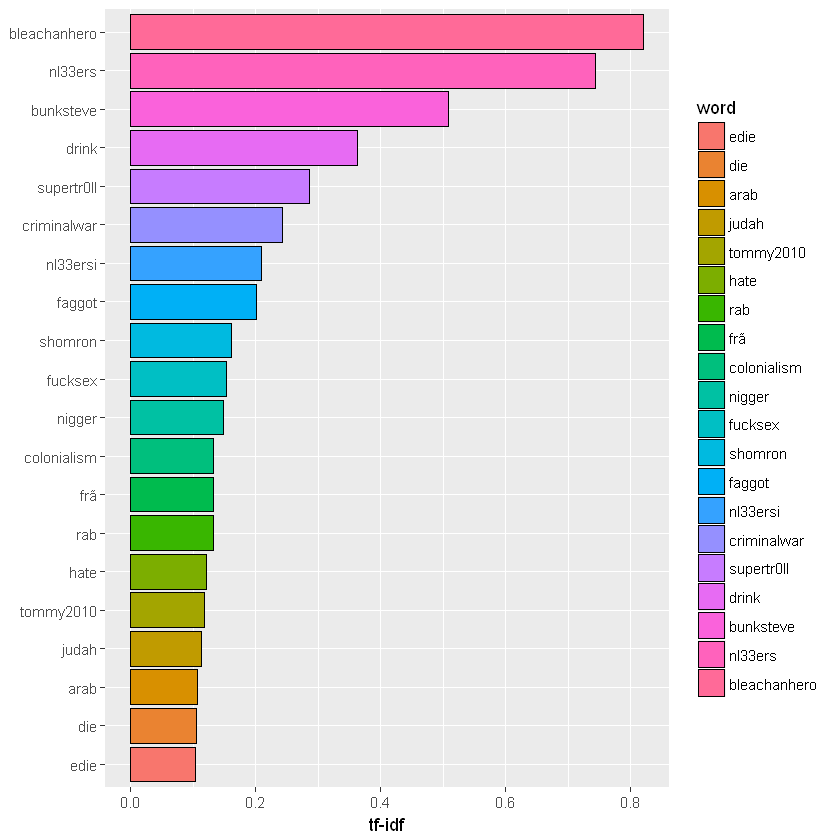

In [52]:
#list of 20 most important words
class = 1:41
total_words$class <- class
trainWords <- left_join(Words, total_words)

trainWords <- trainWords %>%
  bind_tf_idf(word, class, n)

trainWords %>%
  arrange(desc(tf_idf)) %>%
  mutate(word = factor(word, levels = rev(unique(word)))) %>% 
  top_n(20) %>%
  ggplot(aes(word, tf_idf)) +
  geom_col(aes(fill = word), color = 'black') +
  labs(x = NULL, y = "tf-idf") +
  coord_flip()
  

We now are able to draw the most important words and clearly it makes sense to have them(toxic words) in our list.
Let's look into them in detail by each target variable.

In [66]:
trainWords <- trainWords %>%
  arrange(desc(tf_idf)) %>%
  mutate(word = factor(word, levels = rev(unique(word))))

Selecting by tf_idf


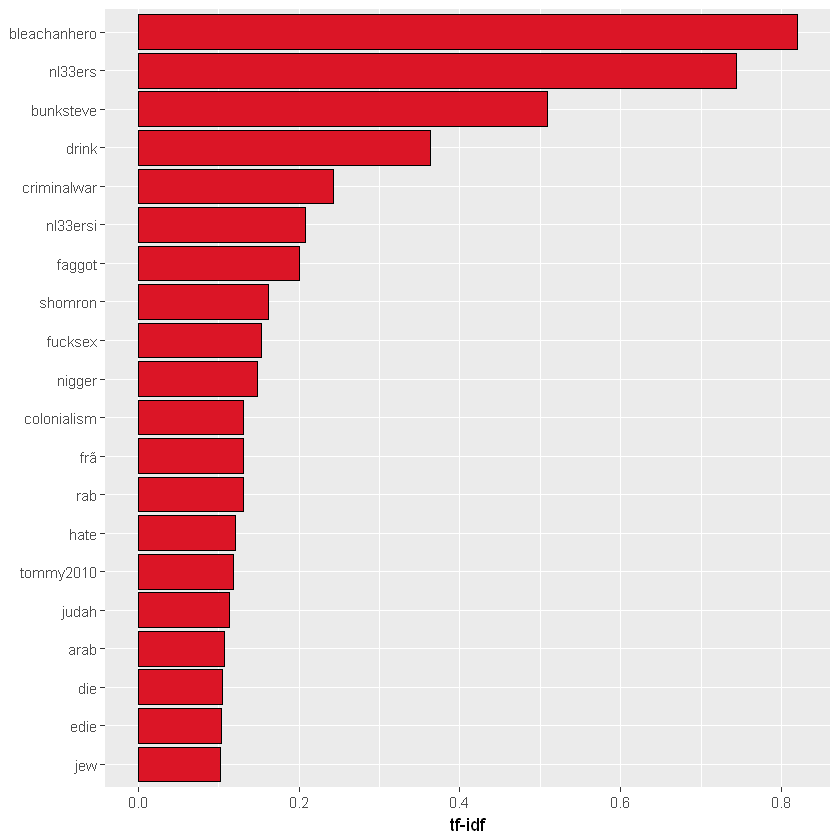

In [86]:
#important words in toxic
trainWords %>%
  filter(toxic == 1) %>%
  top_n(20) %>%
  ggplot(aes(word, tf_idf)) +
  geom_col(fill = '#db1526', color = 'black') +
  labs(x = NULL, y = "tf-idf") +
  coord_flip()

Selecting by tf_idf


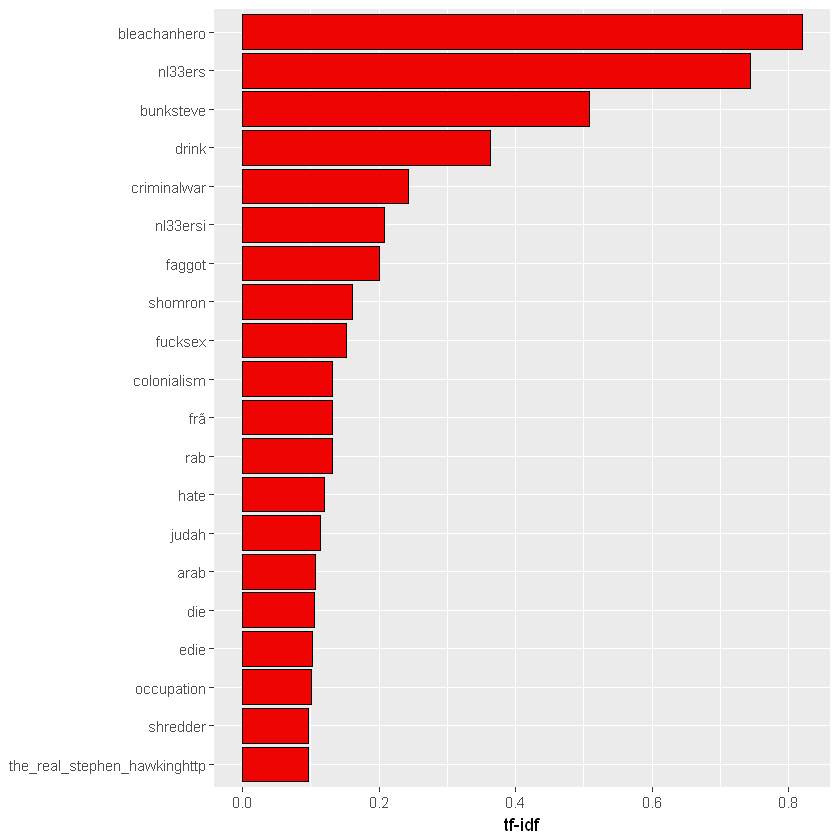

In [84]:
#important words in severe_toxic
trainWords %>%
  filter(severe_toxic == 1) %>%
  top_n(20) %>%
  ggplot(aes(word, tf_idf)) +
  geom_col(fill = '#ef0404', color = 'black') +
  labs(x = NULL, y = "tf-idf") +
  coord_flip()

Selecting by tf_idf


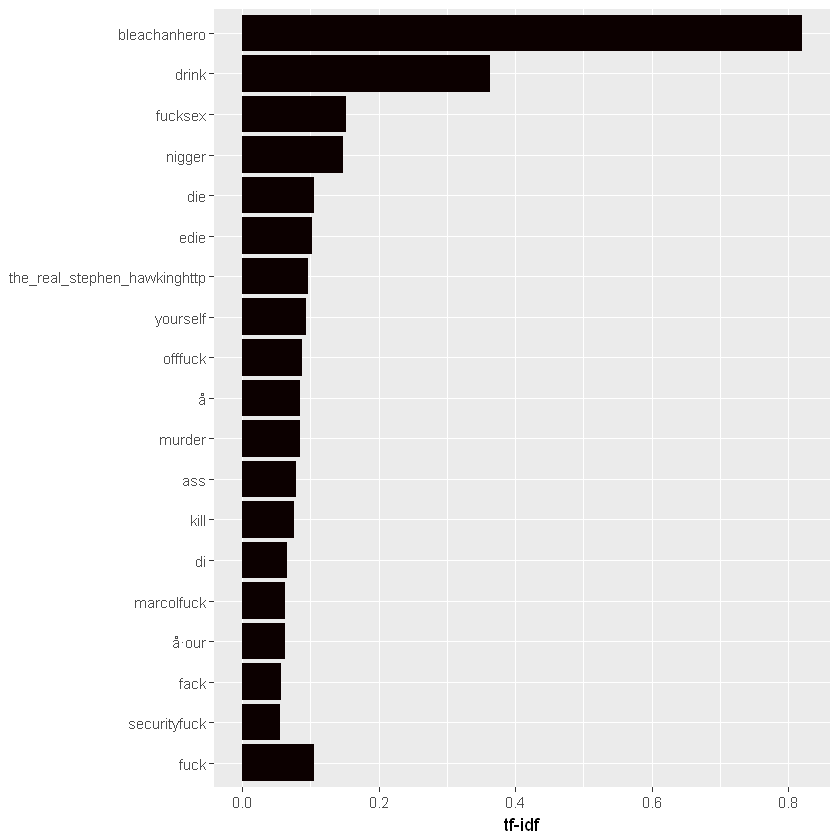

In [82]:
#important words in obscene
trainWords %>%
  filter(obscene == 1) %>%
  top_n(20) %>%
  ggplot(aes(word, tf_idf)) +
  geom_col(fill = '#0c0000') +
  labs(x = NULL, y = "tf-idf") +
  coord_flip()

Selecting by tf_idf


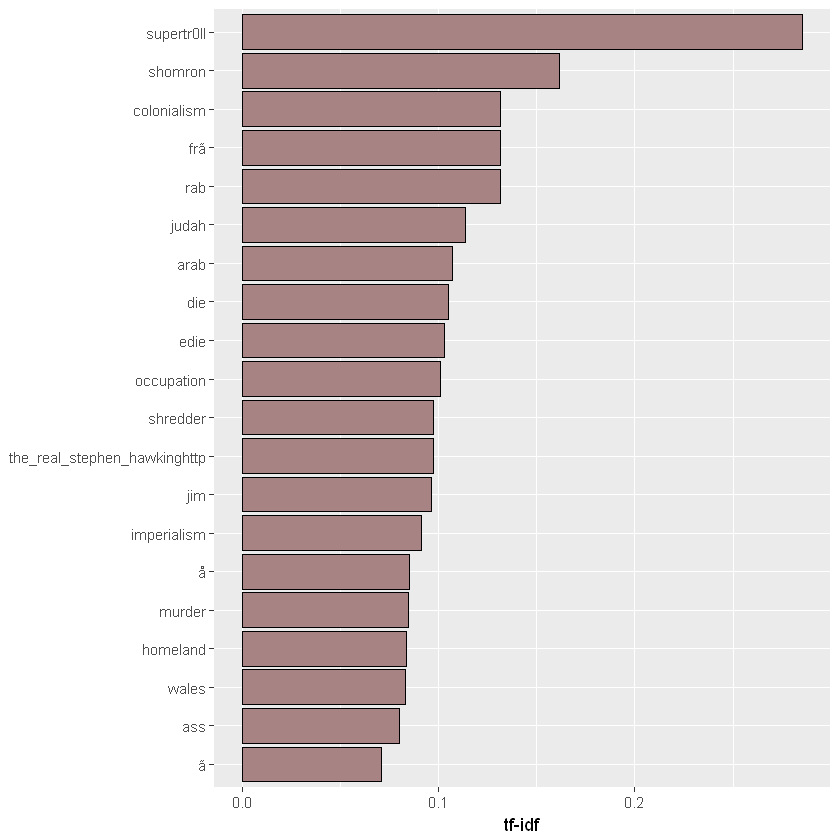

In [87]:
#important words in threat
trainWords %>%
  filter(threat == 1) %>%
  top_n(20) %>%
  ggplot(aes(word, tf_idf)) +
  geom_col(fill = '#a78383', color = 'black') +
  labs(x = NULL, y = "tf-idf") +
  coord_flip()

Selecting by tf_idf


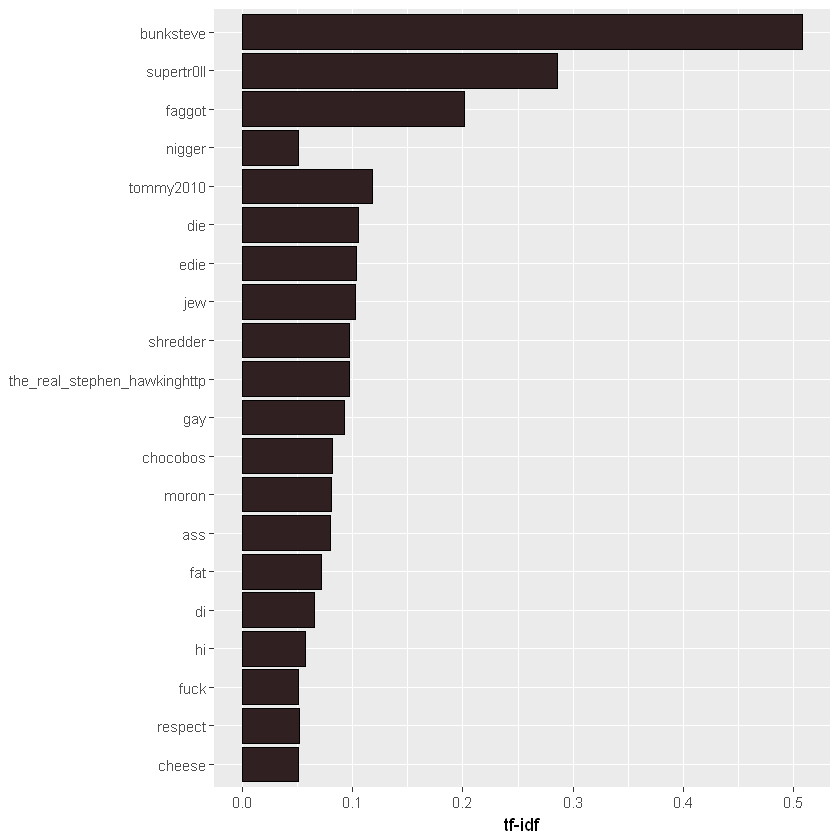

In [88]:
#important words in insult
trainWords %>%
  filter(insult == 1) %>%
  top_n(20) %>%
  ggplot(aes(word, tf_idf)) +
  geom_col(fill = '#302022', color = 'black') +
  labs(x = NULL, y = "tf-idf") +
  coord_flip()

Selecting by tf_idf


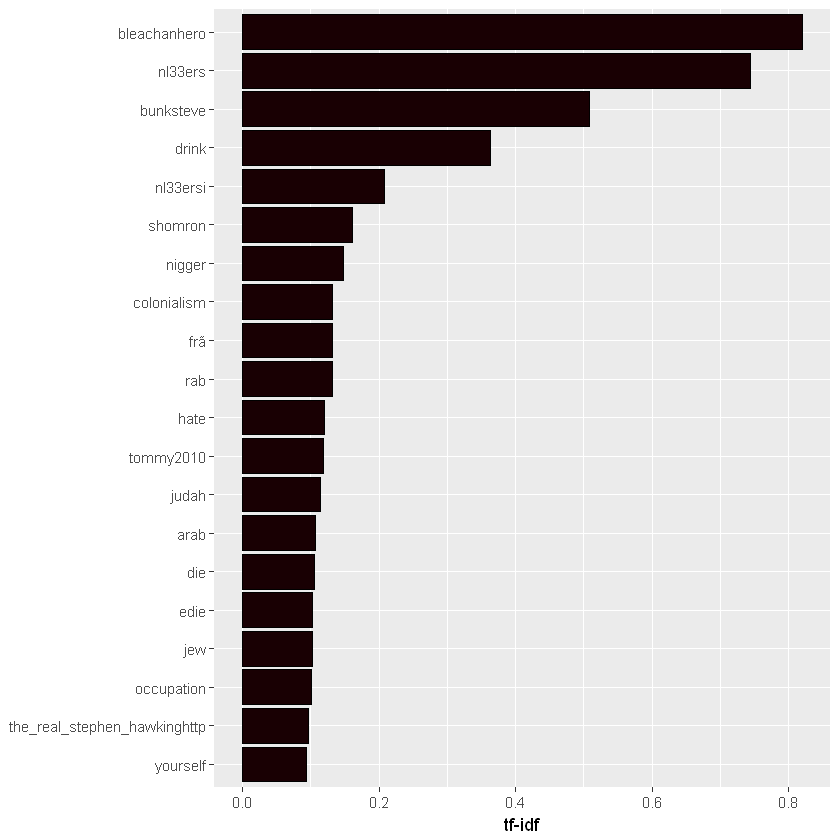

In [89]:
#important words in identity_hate
trainWords %>%
  filter(identity_hate == 1) %>%
  top_n(20) %>%
  ggplot(aes(word, tf_idf)) +
  geom_col(fill = '#190003', color = 'black') +
  labs(x = NULL, y = "tf-idf") +
  coord_flip()

How about a wordcloud for the same,

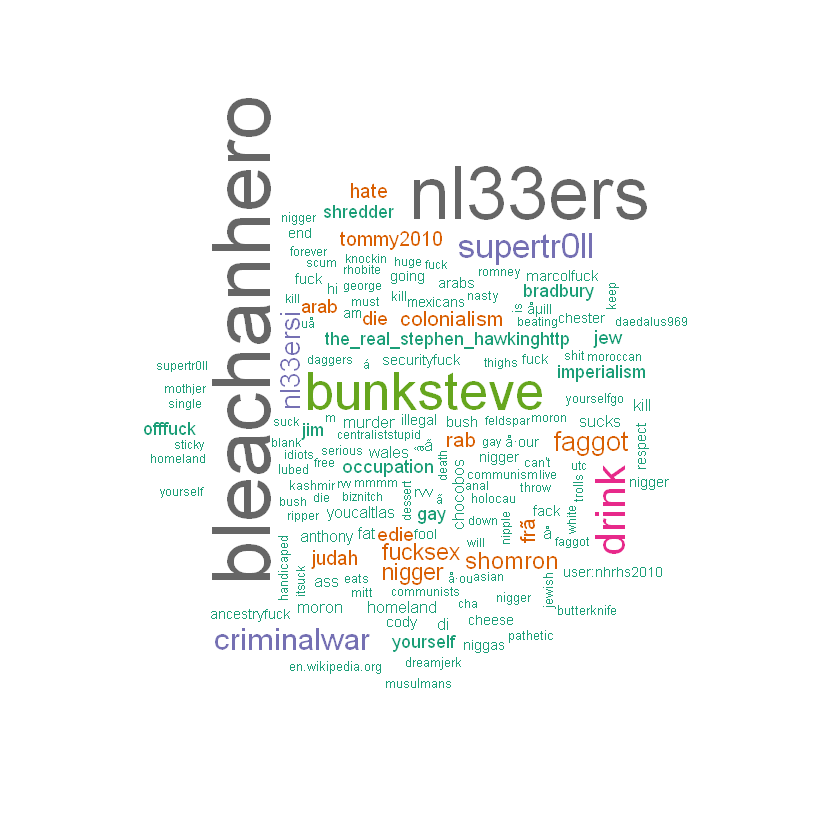

In [100]:
trainWords %>%
  with(wordcloud(word, tf_idf, max.words = 150,colors=brewer.pal(8, "Dark2")))